# Q-Learning vs Sarsa - Comparison on Cliff Walking Environment

In [1]:
import sys
import seaborn as sns
import pandas as pd
from src.parameters_data import Parameters
from src.hyperparameters_data import Hyperparameters
from src.cliff_walking import cliff_walking

In [2]:
data_dir = "data"
results_dir = "results"
number_of_runs = 100
episodes = 500

In [3]:
alpha = 0.1
gamma = 0.99
epsilon = 0.1
epsilon_min = 0.1
epsilon_dec = 1


cliff_walking_parameters = Parameters(
    base_filename="training",
    episodes=episodes,
    data_dir=data_dir,
    results_dir=results_dir
)
cliff_walking_hyperparameters = Hyperparameters(
    alpha=alpha,
    gamma=gamma,
    epsilon=epsilon,
    epsilon_min=epsilon_min,
    epsilon_dec=epsilon_dec
)

for algorithm in ["Q-Learning", "Sarsa"]:
# for algorithm in ["Sarsa"]:
# for algorithm in ["Q-Learning"]:
    for i in range(1, number_of_runs+1):
        print(f"Run {i} of {number_of_runs} - {algorithm}", end="\r")
        training_name = f"training-{i}"
        cliff_walking_parameters.update_base_filename(training_name)
        steps = cliff_walking(
            hyperparameters=cliff_walking_hyperparameters,
            parameters=cliff_walking_parameters,
            algorithm_choice=algorithm
        )

In [24]:
algorithms = ["q-learning", "sarsa"]
data_collected = ["rewards", "actions"]
df = pd.DataFrame()
for algorithm in algorithms:
    for i in range(1, number_of_runs+1):
        new_df = pd.read_feather(f"{data_dir}/{algorithm}-training-{i}.feather")
        new_df.index.name = "episode"
        new_df["algorithm"] = algorithm
        df = pd.concat([df, new_df])

df.to_feather(f"{data_dir}/cliff-walking.feather")

<Axes: xlabel='episode', ylabel='rewards'>

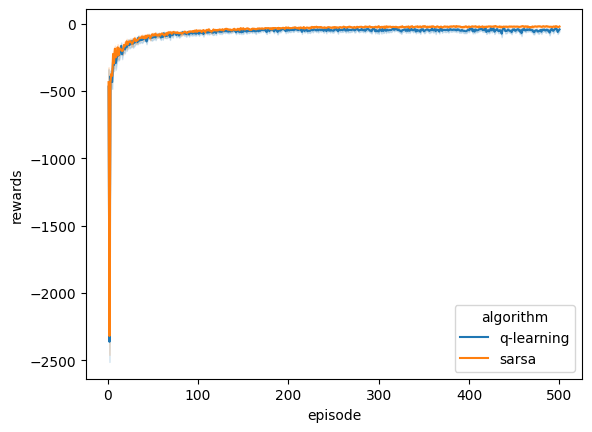

In [25]:
sns.lineplot(x="episode", y="rewards", hue="algorithm", data=df)

<Axes: xlabel='episode', ylabel='actions'>

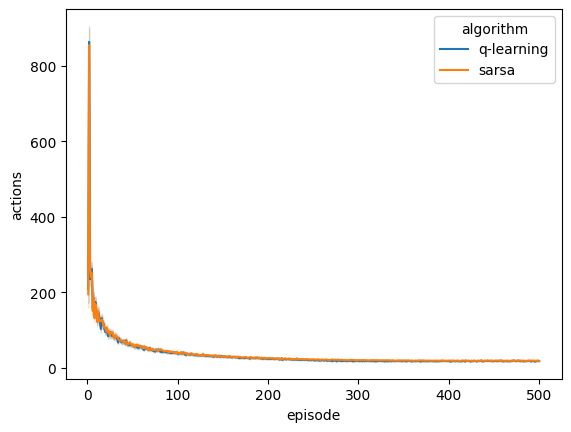

In [19]:
sns.lineplot(x="episode", y="actions", hue="algorithm", data=df)